In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [44]:
house = pd.read_csv('Islamabad_zameen.csv',sep = "|")
house.head()

,city,location,price,bedrooms,baths,size
0,Islamabad,"B-17, Islamabad",17200000,2,2,1485.0
1,Islamabad,"F-7, Islamabad",380000000,6,7,5850.0
2,Islamabad,"B-17, Islamabad",9310000,2,2,922.0
3,Islamabad,"Bahria Garden City - Zone 1, Bahria Garden City",130000000,5,6,9000.0
4,Islamabad,"Al Karim Residence, H-13",5040000,0,0,428.0


<Axes: >

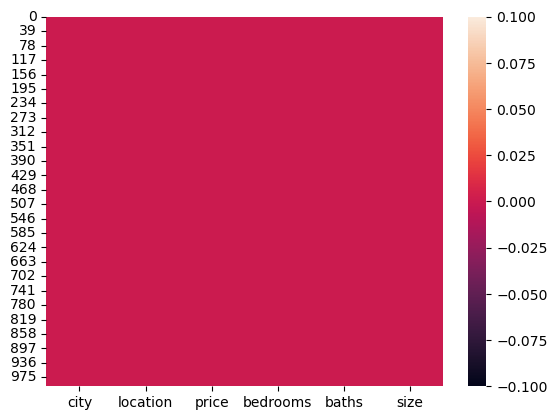

In [45]:
sns.heatmap(house.isnull())

In [46]:
x = house[['size','bedrooms' , 'baths']]
y = house['price']


In [47]:
x

,size,bedrooms,baths
0,1485.0,2,2
1,5850.0,6,7
2,922.0,2,2
3,9000.0,5,6
4,428.0,0,0
...,...,...,...
995,9000.0,7,6
996,1800.0,6,7
997,5400.0,6,7
998,1800.0,0,0


In [55]:
x_mean = x.mean()
x_std = x.std()
X = (x - x_mean) /x_std
X

,size,bedrooms,baths
0,-0.547848,-0.970999,-0.923596
1,0.663685,0.799282,1.237368
2,-0.704112,-0.970999,-0.923596
3,1.537987,0.356712,0.805175
4,-0.841225,-1.856139,-1.787982
...,...,...,...
995,1.537987,1.241852,0.805175
996,-0.460418,0.799282,1.237368
997,0.538784,0.799282,1.237368
998,-0.460418,-1.856139,-1.787982


In [48]:
y

0       17200000
1      380000000
2        9310000
3      130000000
4        5040000
         ...    
995     70000000
996     32500000
997     60000000
998     28500000
999     11500000
Name: price, Length: 1000, dtype: int64

In [57]:
Y = np.log(y+1)
Y

0      16.660420
1      19.755682
2      16.046600
3      18.683045
4      15.432917
         ...    
995    18.064006
996    17.296751
997    17.909855
998    17.165415
999    16.257858
Name: price, Length: 1000, dtype: float64

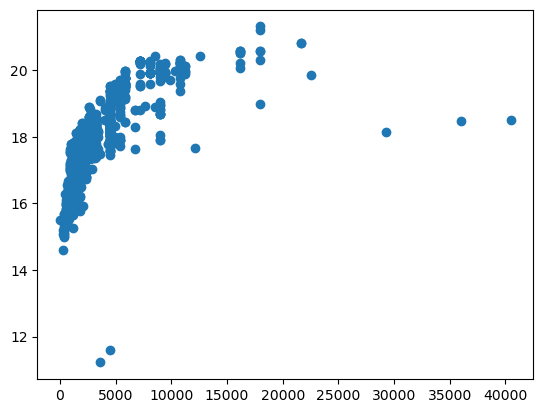

In [83]:
plt.scatter(x.iloc[:,0],Y)

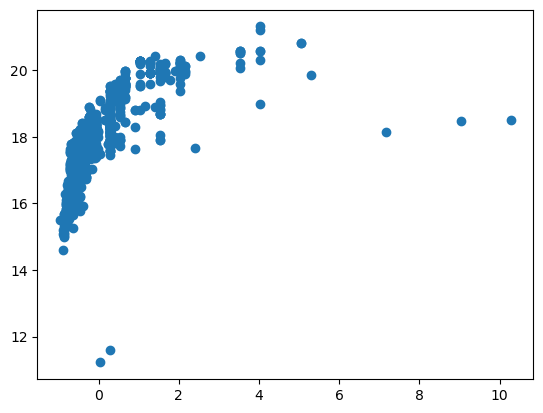

In [84]:
plt.scatter(X.iloc[:,0],Y)

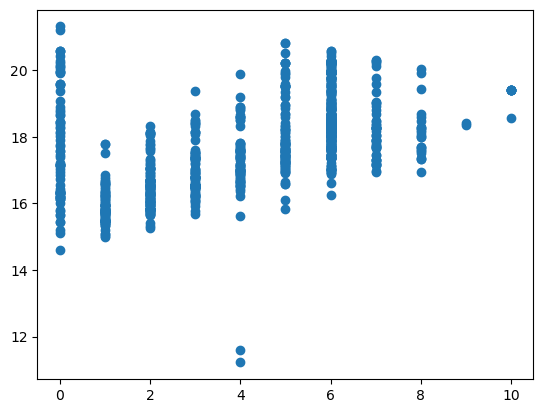

In [77]:
plt.scatter(x.iloc[:,2],Y)

In [58]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.30)

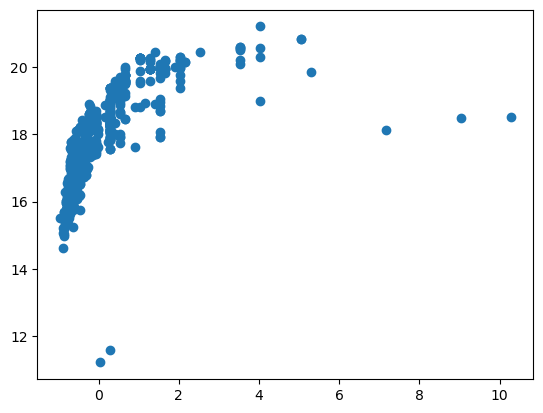

In [74]:
plt.scatter(x_train.iloc[:,0],y_train)

In [60]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [61]:
predict=model.predict(x_test)

In [62]:
predict

array([16.46995634, 18.98166627, 16.71239222, 18.40830318, 17.58921305,
       18.54853925, 16.91650993, 17.00642783, 17.5495682 , 18.38472123,
       17.19835019, 18.32508452, 18.44860286, 15.97887962, 18.36113928,
       17.15739569, 18.63306756, 18.60686632, 17.81266779, 16.62629675,
       18.09869451, 16.61410141, 20.11864696, 18.44304829, 16.69182396,
       17.22127732, 15.97068872, 20.90299197, 16.66725126, 16.60172405,
       17.13521882, 17.32611346, 18.38472123, 18.36933018, 19.05115649,
       19.10518461, 17.72944913, 17.52533142, 16.90012813, 19.75359249,
       16.7720874 , 18.38472123, 18.94005694, 17.02699609, 17.81266779,
       18.38472123, 18.05708518, 18.73990224, 17.91684911, 17.95714879,
       15.92737535, 18.61242089, 18.27494836, 19.30930232, 17.454627  ,
       16.60572849, 17.75303108, 16.30331996, 19.03999333, 18.27494836,
       16.65086945, 16.96146888, 16.65086945, 16.91232347, 16.23378831,
       19.42595644, 19.20381136, 16.22141095, 16.59771961, 17.23

In [87]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, predict)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predict))
r2 = metrics.r2_score(y_test, predict)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 0.4866181190865344
RMSE: 0.6168489032498661
R²: 0.7659149860823162


In [103]:
import numpy as np

# Suppose x_mean and x_std are pandas Series
x_mean_np = x_mean.values
x_std_np = x_std.values

# new house row
new_house = np.array([[420, 0, 0]])  # shape (1, n_features)

# Standardize
new_house_norm = (new_house - x_mean_np) / x_std_np

# Predict (if your Y is log-transformed)
predict_log = model.predict(new_house_norm)
predict_original = np.exp(predict_log)-1
print("Predicted price:", predict_original[0])


Predicted price: 8251611.463592332


C:\Users\SAMI\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
